# Data Exploration - 120 years of Olympics

This notebook contains some insights from the data that will be later used for the visualization project. 
The notebook contains the following sections: 
* #### Analysis from a historical point of view [1](#Analysis-from-historical-point-of-view)

In this section we will explore different topics and how they have evolved along years. We centered the analysis in the Summer games just for convinience but exploring the Winter games can easily be done by chaging the filter of the exploration.

* #### Analysis from Sports point of view [2](#Sport-point-of-view)

In this section we will explore how the sports are divided in terms of sex and individual vs collective along time.

* #### Analysis from a National Olympic Committee point of view [3](#Country-point-of-view)

In this section we will look for the Olympic Committees with larger number of medals. Other details such as number of participations are explored in the historical section.


* #### Analysis from an Athlete point of view [4](#Athlete-point-of-view)

In this section we will explore some extreme cases among the athletes such as those with larger number of medals. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_athletes = pd.read_csv('./data/athlete_events.csv')

print('Number of entries {}'.format(df_athletes.shape[0]))
print('Features:')
for x in list(df_athletes.columns):
    print('\t *\t{}'.format(x))

Number of entries 271116
Features:
	 *	ID
	 *	Name
	 *	Sex
	 *	Age
	 *	Height
	 *	Weight
	 *	Team
	 *	NOC
	 *	Games
	 *	Year
	 *	Season
	 *	City
	 *	Sport
	 *	Event
	 *	Medal


In [3]:
df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Analysis from historical point of view

In this section we explore some data along the different years.

## History of the Games

In [4]:
df_athletes[['Year','Season']].drop_duplicates().sort_values('Year').reset_index(drop=True)

,Year,Season
0,1896,Summer
1,1900,Summer
2,1904,Summer
3,1906,Summer
4,1908,Summer
5,1912,Summer
6,1920,Summer
7,1924,Winter
8,1924,Summer
9,1928,Winter


#### General Observations

* The Olympic Games are celebrated every 4 years. **What happened in 1906?** The **1906 Intercalated Games were held in Athens.** These Games were, but are not now, officially recognised by the IOC and no Intercalated Games have been held since. 


* In **1924 the first Winter Olympic Games** were held in Chamonix. However, Figure skating (in 1908 and 1920) and Ice hockey (in 1920) were featured as Olympic events at the Summer Olympics.


* Both Summer and Winter Olympic Games were celebrated the same year until 1992. Beginning in 1994, the Winter Olympics were held every four years, two years after each Summer Olympics.


* In **1916 no Games were held**. They were cancelled due to the outbreak of World War I. 


* In **1940 and 1944 no Games were held**. They were cancelled due to the World War II.


* The next Games were supposed to be held in **2020** in Tokyo, Japan. However, due to the coronavirus pandemic, **the Games will be rescheduled** to a date no later than summer 2021, and that the Games would keep the name Tokyo 2020. This is the first time in history that the Olympics have been postponed, rather than canceled.

### Number of athletes per year

In [5]:
df_athletes['type_event'] = df_athletes['Event'].apply(lambda x: ' '.join((x.split()[2:])))

#### Summer Games

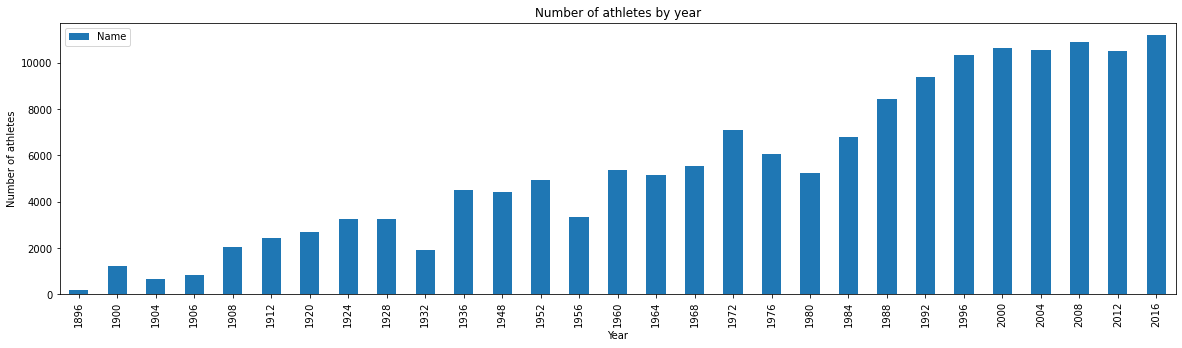

In [6]:
f, ax = plt.subplots(figsize=(20,5))
df_athletes[df_athletes.Season == 'Summer'].groupby('Year').agg({'Name':'nunique'}).\
plot(kind='bar', ax=ax, title='Number of athletes by year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of athletes')
plt.show()

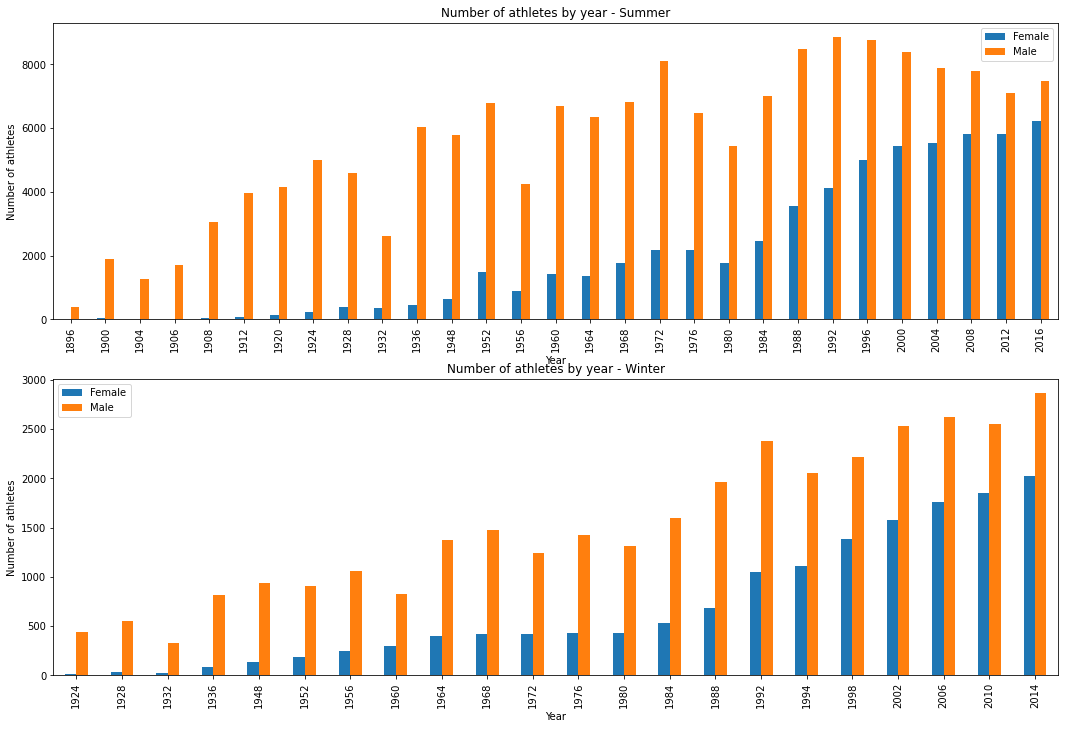

In [7]:
f, ax = plt.subplots(2, 1, figsize=(18,12))
pd.pivot_table(df_athletes[df_athletes.Season == 'Summer'].groupby(['Year', 'Sex']).agg({'Name':'count'}), \
              index='Year', columns='Sex').\
plot(kind='bar',  title='Number of athletes by year - Summer', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of athletes')
ax[0].legend(['Female', 'Male'])

pd.pivot_table(df_athletes[df_athletes.Season == 'Winter'].groupby(['Year', 'Sex']).agg({'Name':'count'}), \
              index='Year', columns='Sex').\
plot(kind='bar', title='Number of athletes by year - Winter', ax=ax[1])
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of athletes')
ax[1].legend(['Female', 'Male'])
plt.show()

In [8]:
print('Number of unique athletes: {}'.format(df_athletes.Name.nunique()))
print('Number of unique athletes (Summer): {}'.format(\
        df_athletes[df_athletes.Season == 'Summer'].Name.nunique()))
print('Number of unique athletes (Winter): {}'.format(\
        df_athletes[df_athletes.Season == 'Winter'].Name.nunique()))
a = set(df_athletes[df_athletes.Season == 'Summer'].Name.unique())
b = set(df_athletes[df_athletes.Season == 'Winter'].Name.unique())
print('Athletes participating in both summer and winter games: {}\n'.format( len(a.intersection(b))))
print('Number of unique host cities: {}'.format(df_athletes.City.nunique()))
print('Number of unique host cities (Summer): {}'.format(\
        df_athletes[df_athletes.Season == 'Summer'].City.nunique()))
print('Number of unique host cities (Winter): {}'.format(\
        df_athletes[df_athletes.Season == 'Winter'].City.nunique()))



Number of unique athletes: 134732
Number of unique athletes (Summer): 116122
Number of unique athletes (Winter): 18923
Athletes participating in both summer and winter games: 313

Number of unique host cities: 42
Number of unique host cities (Summer): 23
Number of unique host cities (Winter): 19


## Summer Olympics

In the following sections we are only using the data of the summer olympics. The same exploration can be done for the winter olympics easily. We will add it depending on what we decide to visualize.

### Sports by year

In [9]:
sport_by_year = df_athletes[df_athletes.Season == 'Summer'][['Year', 'Sport']].groupby('Year')['Sport'].apply(set)

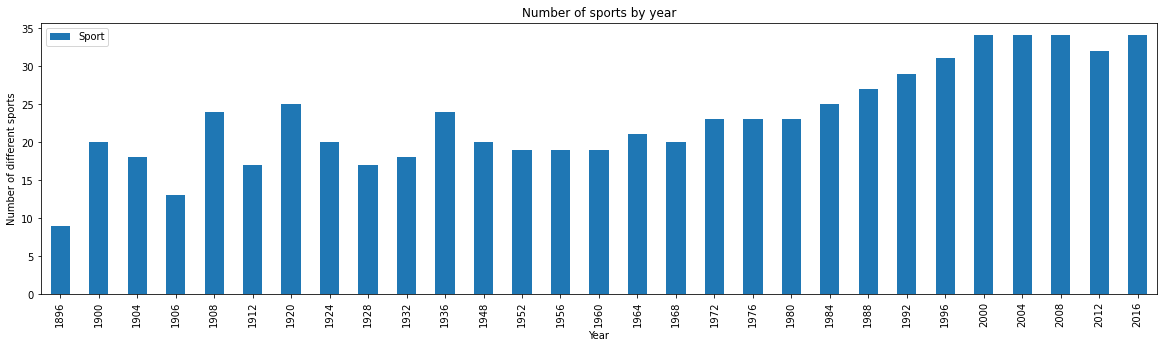

In [10]:
f, ax = plt.subplots(figsize=(20,5))
df_athletes[df_athletes.Season == 'Summer'].groupby('Year').agg({'Sport':'nunique'}).\
plot(kind='bar', ax=ax, title='Number of sports by year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of different sports')
plt.show()

In [11]:
years = sorted(df_athletes[df_athletes.Season == 'Summer'].Year.unique())
disappearing_sports = [(years[i], list(sport_by_year[years[i-1]] - sport_by_year[years[i]])) for i in range(1,len(years))]
new_sports = [(years[i], list(sport_by_year[years[i]] - sport_by_year[years[i-1]])) for i in range(1,len(years))]

In [12]:
# adding the first year
new_sports.insert(0, (years[0], list(sport_by_year[years[0]])))
disappearing_sports.insert(0, (years[0], []))

In [13]:
pd.DataFrame([(x,y[1],z[1]) for x, y, z in zip(years, new_sports, disappearing_sports)], columns=['Year', 'New', 'Disappearing'])

,Year,New,Disappearing
0,1896,"[Fencing, Athletics, Weightlifting, Wrestling,...",[]
1,1900,"[Rowing, Equestrianism, Croquet, Tug-Of-War, F...","[Weightlifting, Wrestling]"
2,1904,"[Roque, Weightlifting, Wrestling, Diving, Boxi...","[Equestrianism, Croquet, Rugby, Shooting, Polo..."
3,1906,[Shooting],"[Roque, Boxing, Golf, Archery, Water Polo, Lac..."
4,1908,"[Racquets, Jeu De Paume, Boxing, Motorboating,...",[Weightlifting]
5,1912,"[Equestrianism, Modern Pentathlon, Art Competi...","[Racquets, Jeu De Paume, Motorboating, Figure ..."
6,1920,"[Weightlifting, Figure Skating, Rugby, Polo, I...",[]
7,1924,[],"[Tug-Of-War, Figure Skating, Ice Hockey, Arche..."
8,1928,[Hockey],"[Rugby, Shooting, Tennis, Polo]"
9,1932,"[Shooting, Alpinism]",[Football]


In [14]:
sport_year = pd.pivot_table(df_athletes[df_athletes.Season == 'Summer'][['Year', 'Sport', 'ID']].groupby(['Year', 'Sport'])\
               .count().reset_index(),
               index='Sport', columns='Year').fillna(0)

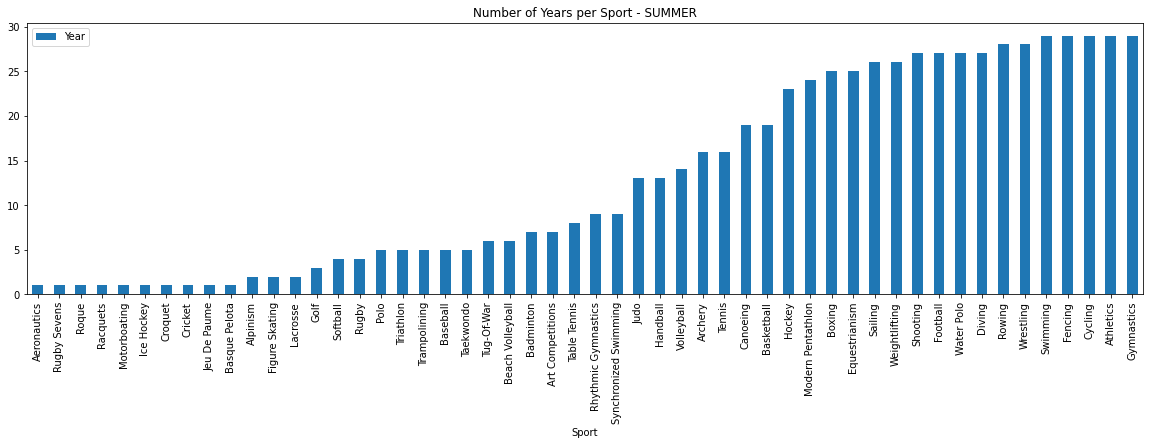

In [15]:
f, ax = plt.subplots(figsize=(20,5))
df_athletes[df_athletes.Season == 'Summer'][['Year', 'Sport']].groupby(['Sport'])\
               .nunique().sort_values('Year').plot(kind='bar',y='Year', ax=ax)
ax.set_title('Number of Years per Sport - SUMMER')
plt.show()


In [16]:
# Winter sports in the summer games
df_athletes[(df_athletes.Season == 'Summer') & \
            (df_athletes.Sport.isin(df_athletes[df_athletes.Season == 'Winter'].Sport.unique()))].\
groupby(['Sport', 'Year']).nunique()

ID  Name  Sex  Age  Height  Weight  Team  NOC  Games  \
Sport          Year                                                         
Alpinism       1932   2     2    1    2       0       0     1    1      1   
               1936   2     2    2    2       0       0     1    1      1   
Figure Skating 1908  21    21    2   12       0       0     8    6      1   
               1920  26    26    2   15       2       2    11    8      1   
Ice Hockey     1920  60    60    1   19      11      13     7    7      1   

                     Year  Season  City  Sport  Event  Medal  type_event  
Sport          Year                                                       
Alpinism       1932     1       1     1      1      1      1           1  
               1936     1       1     1      1      1      1           1  
Figure Skating 1908     1       1     1      1      4      3           4  
               1920     1       1     1      1      3      3           3  
Ice Hockey     1920     1       1     1      1      1      3           1

### Countries (as in National Olympic Comittee - NOC) by year

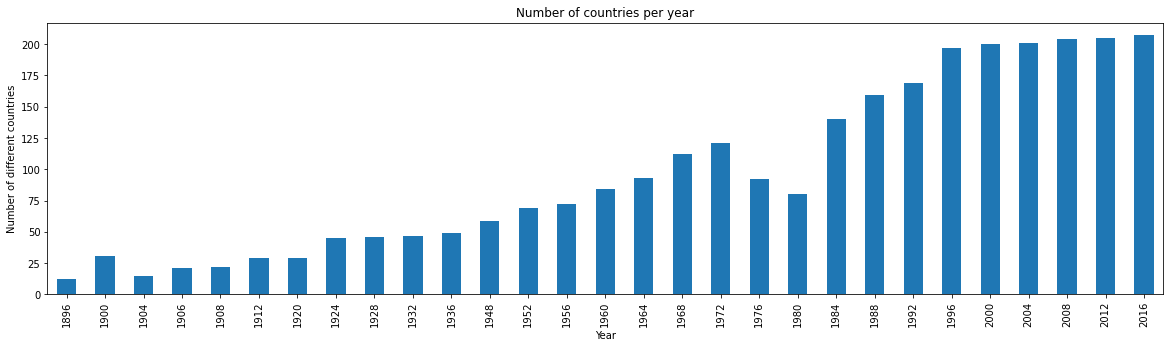

In [17]:
country_per_year = df_athletes[df_athletes.Season == 'Summer'].groupby(['Year'])['NOC'].nunique()

f, ax = plt.subplots(figsize=(20,5))
country_per_year.plot(kind='bar', title='Number of countries per year', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of different countries')
plt.show();

In [18]:
years = sorted(df_athletes[df_athletes.Season == 'Summer'].Year.unique())
noc_per_year = df_athletes[df_athletes.Season == 'Summer'][['Year', 'NOC']].groupby('Year')['NOC'].apply(set)

disappearing_noc = [(years[i], list(noc_per_year[years[i-1]] - noc_per_year[years[i]])) for i in range(1,len(years))]
new_noc = [(years[i], list(noc_per_year[years[i]] - noc_per_year[years[i-1]])) for i in range(1,len(years))]

In [19]:
# adding the first year
new_noc.insert(0, (years[0], list(noc_per_year[years[0]])))
disappearing_noc.insert(0, (years[0], []))

In [20]:
df_noc = pd.read_csv('./data/noc_regions.csv')
df_noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [21]:
# create dictionary with NOC and regions
noc_dict = df_noc[['NOC', 'region']].set_index('NOC').to_dict()['region']

# add missing entry
noc_dict['SGP'] = 'Singapore'

In [22]:
for e, d in zip(new_noc, disappearing_noc):
    print('Year: ', e[0])
    print('\n\t New country (NOC): ', [noc_dict[i] for i in e[1]])
    print('\n\t Disappearing country (NOC):', [noc_dict[i] for i in d[1]],'\n\n')

Year:  1896

	 New country (NOC):  ['Hungary', 'Australia', 'Austria', 'Denmark', 'Switzerland', 'Sweden', 'USA', 'Greece', 'UK', 'France', 'Italy', 'Germany']

	 Disappearing country (NOC): [] 


Year:  1900

	 New country (NOC):  ['Luxembourg', 'Russia', 'Canada', 'Brazil', 'Norway', 'Colombia', 'New Zealand', 'Czech Republic', 'Netherlands', 'Spain', 'Romania', 'Cuba', 'Mexico', 'Haiti', 'Iran', 'Argentina', 'Belgium', 'Peru', 'India']

	 Disappearing country (NOC): [] 


Year:  1904

	 New country (NOC):  ['Canada', 'South Africa']

	 Disappearing country (NOC): ['Spain', 'Haiti', 'Iran', 'Denmark', 'Luxembourg', 'Argentina', 'Romania', 'Brazil', 'Sweden', 'Netherlands', 'Russia', 'Mexico', 'Belgium', 'Colombia', 'Peru', 'New Zealand', 'Czech Republic', 'India'] 


Year:  1906

	 New country (NOC):  ['Denmark', 'Finland', 'Turkey', 'Sweden', 'Greece', 'Belgium', 'Egypt', 'Czech Republic', 'Netherlands']

	 Disappearing country (NOC): ['Cuba', 'Canada', 'South Africa'] 


Year:  190

In [23]:
noc_years = df_athletes[df_athletes.Season == 'Summer'].groupby(['NOC']).agg({'Year':'nunique'})\
            .sort_values('Year', ascending=False)
noc_years

,Year
NOC,
SUI,29
ITA,29
GBR,29
GRE,29
FRA,29
...,...
UAR,1
KOS,1
RHO,1


### Host cities

In [24]:
df_cities = pd.read_csv('./data/host_cities.csv')

In [25]:
df_host_cities = df_athletes[['City', 'Year']].drop_duplicates().reset_index(drop=True)

In [26]:
df_host_cities = df_host_cities.join(df_cities.set_index('City'), on='City')

In [27]:
print('Countries hosting both Winter and Summer Events: ')
set(df_host_cities[df_host_cities.Season == 'Summer'].Country.unique()).intersection(df_host_cities[df_host_cities.Season == 'Winter'].Country.unique())

Countries hosting both Winter and Summer Events: 


{'Canada', 'France', 'Germany', 'Italy', 'Japan', 'Russia', 'USA'}

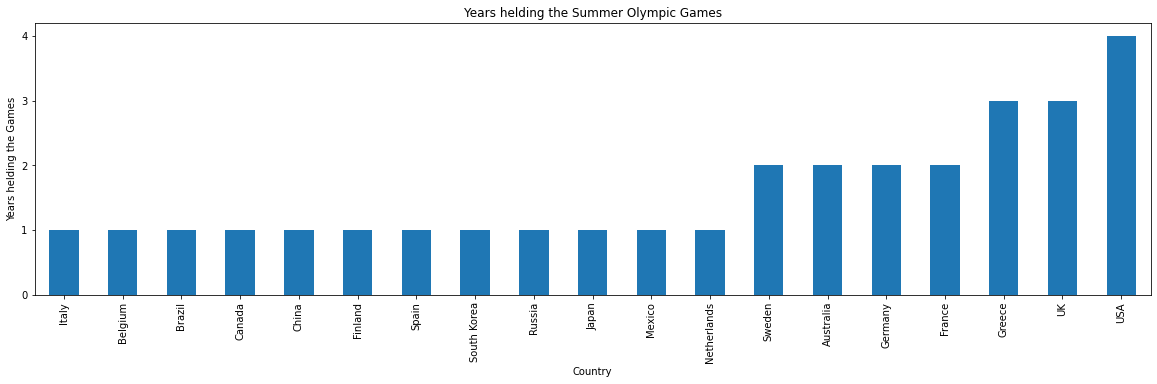

In [28]:
f, ax = plt.subplots(figsize=(20,5))
df_host_cities[df_host_cities['Season'] == 'Summer'].groupby('Country')['City']\
    .count().sort_values().plot(kind='bar', ax=ax, title='Years helding the Summer Olympic Games')
ax.set_ylabel('Years helding the Games')
ax.set_yticks(range(0,5))
plt.show()

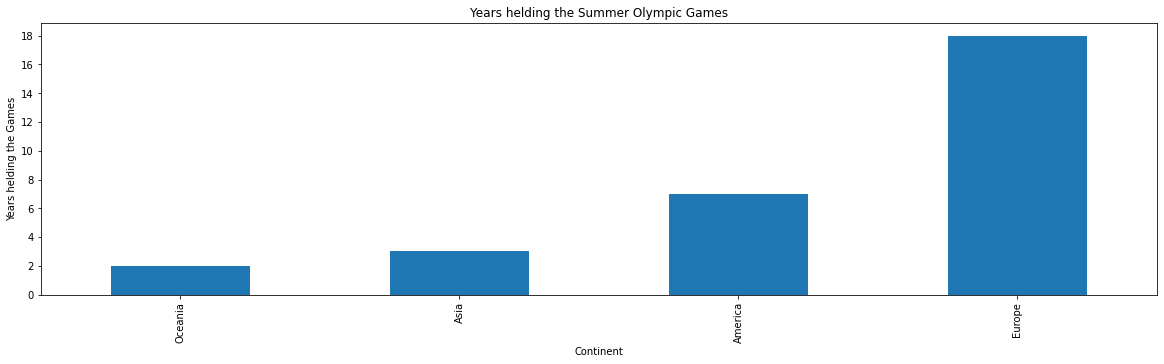

In [29]:
f, ax = plt.subplots(figsize=(20,5))
df_host_cities[df_host_cities['Season'] == 'Summer'].groupby('Continent')['City']\
    .count().sort_values().plot(kind='bar', ax=ax, title='Years helding the Summer Olympic Games')
ax.set_ylabel('Years helding the Games')
ax.set_yticks(range(0,19,2))
plt.show()

## Sport point of view

### Sports

Number of events for each sport category.

In [30]:
sports_category = df_athletes[df_athletes['Season']=='Summer'].groupby('Sport').nunique()['Event'].sort_values(ascending=False)
sports_category

Sport
Athletics                83
Shooting                 83
Swimming                 55
Cycling                  44
Sailing                  38
Wrestling                30
Art Competitions         29
Archery                  29
Canoeing                 27
Gymnastics               27
Rowing                   25
Weightlifting            21
Equestrianism            18
Fencing                  18
Judo                     15
Boxing                   15
Diving                   10
Tennis                    9
Taekwondo                 8
Table Tennis              6
Badminton                 5
Figure Skating            4
Golf                      3
Croquet                   3
Motorboating              3
Modern Pentathlon         3
Synchronized Swimming     3
Water Polo                2
Volleyball                2
Triathlon                 2
Football                  2
Rugby Sevens              2
Trampolining              2
Hockey                    2
Basketball                2
Beach Volleyba

We can see that there are sports with a lot of events while there are others with very few of them. This can clearly influence on the number of medals, i.e. the same athlete can win many medals in different events of swimming while in cricket there is only one event.

### Information about the events

#### Inidividual or Team events & Male, female or mixed event

Exploration about whether the events are in teams or individual and the gender of the participants. We add this information in additional columns in the main dataframe.

In [31]:
sport_event = df_athletes[(df_athletes['Medal']=='Gold') | (df_athletes['Medal']=='Silver')].groupby(['Event', 'Year', 'Medal'], as_index=False).\
                count()[['Event', 'Year', 'Medal', 'ID']].drop_duplicates(['Event', 'Medal'], keep='last')

In [32]:
data_sports = []

for _, row in sport_event[sport_event['Medal'] == 'Gold'].iterrows():
    if 'Men' in row['Event']:
        gender = 'M'
    elif 'Women' in row['Event']:
        gender = 'W'
    else:
        gender = 'B'
    if 'Team' in row['Event'] or 'Doubles' in row['Event']:
        type_sport = 'Team'
    else:
        if row['ID'] == 1:
            type_sport = 'Individual'
        else:
            if len(sport_event[(sport_event['Medal'] == 'Silver') &
                          (sport_event['Year'] == row['Year']) &
                          (sport_event['Event'] == row['Event'])]) == 0:
                if row['ID'] == 2 or row['ID'] == 3: # there was a tie
                    type_sport = 'Individual'
                else: 
                    type_sport = 'Team' # there was a tie and it's a team sport
            elif sport_event[(sport_event['Medal'] == 'Silver') &
                      (sport_event['Year'] == row['Year']) &
                      (sport_event['Event'] == row['Event'])]['ID'].values[0] > 1:
                type_sport = 'Team' 
            else:
                type_sport = 'Individual' # after analyzing the exceptions, by default
                
    data_sports.append([row['Event'], type_sport, gender])

In [33]:
df_events = pd.DataFrame(data_sports, columns=['Event', 'Collectivity', 'Gender'])
df_events.head()

,Event,Collectivity,Gender
0,Aeronautics Mixed Aeronautics,Individual,B
1,Alpine Skiing Men's Combined,Individual,M
2,Alpine Skiing Men's Downhill,Individual,M
3,Alpine Skiing Men's Giant Slalom,Individual,M
4,Alpine Skiing Men's Slalom,Individual,M


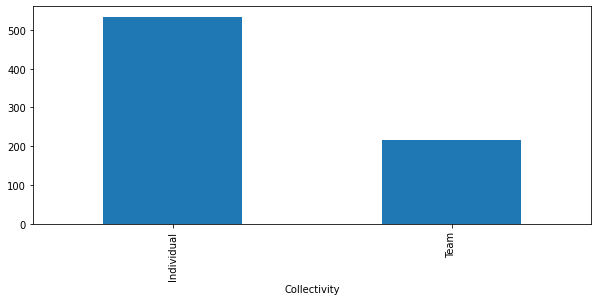

In [34]:
df_events.groupby('Collectivity').count()['Event'].plot(kind='bar', figsize=(10,4))

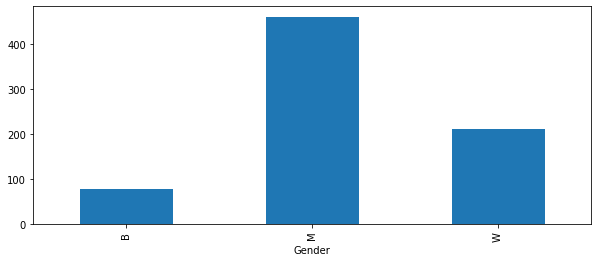

In [35]:
# B - both/mixed, M - Men, W - Women
df_events.groupby('Gender').count()['Event'].plot(kind='bar', figsize=(10,4))

For each sport, we check how many events are individual or in teams.

In [36]:
df_athletes = df_athletes.join(df_events.set_index('Event'), on='Event', how='left')

In [37]:
sports_type = df_athletes[df_athletes['Season'] == 'Summer'].\
        groupby(['Sport', 'Collectivity']).\
        nunique()['Event']

In [38]:
print(sports_type)

Sport             Collectivity
Aeronautics       Individual       1
Alpinism          Individual       1
Archery           Individual      19
                  Team             9
Art Competitions  Individual      18
                                  ..
Tug-Of-War        Team             1
Volleyball        Team             2
Water Polo        Team             2
Weightlifting     Individual      21
Wrestling         Individual      29
Name: Event, Length: 74, dtype: int64


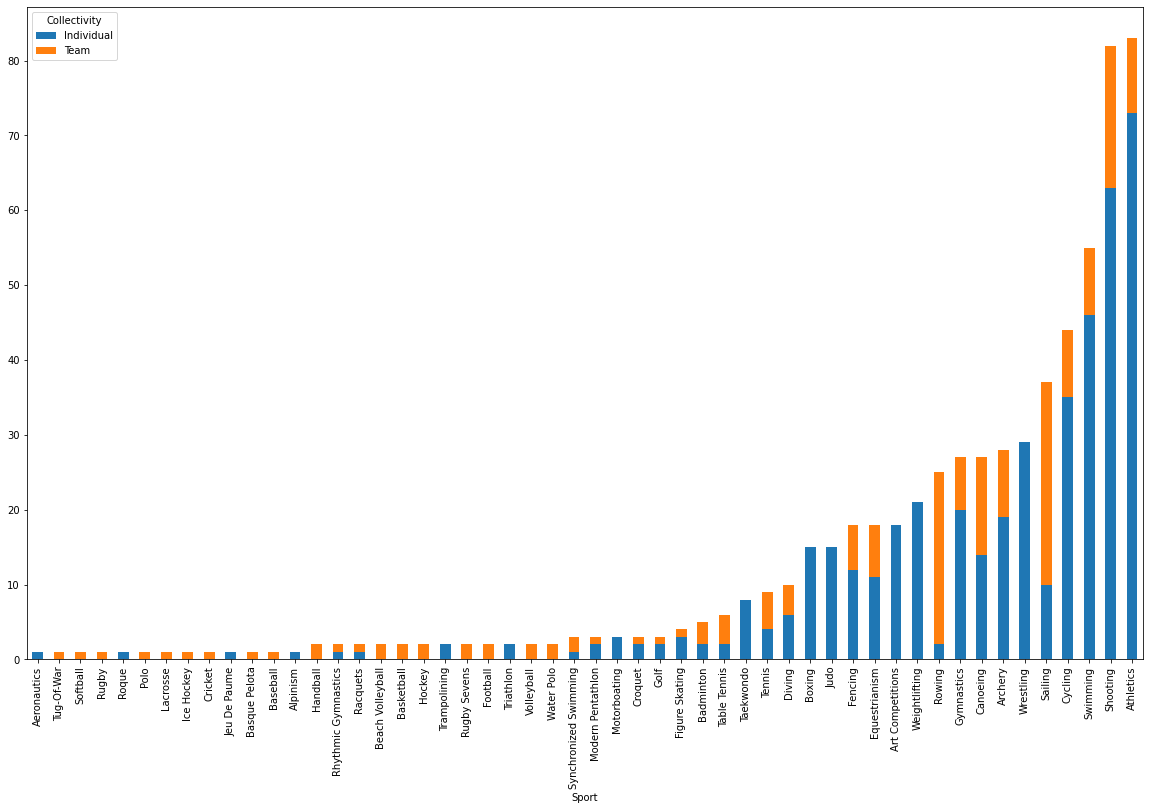

In [39]:
sports_type_unstack = sports_type.unstack().fillna(0)
sports_type_unstack.assign(tmp=sports_type_unstack.sum(axis=1)).\
        sort_values('tmp').drop('tmp', 1).\
        plot(kind='bar', stacked=True, figsize=(20,12));

In [40]:
df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,type_event,Collectivity,Gender
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Basketball,Team,M
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,Extra-Lightweight,Individual,M
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Football,Team,M
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Tug-Of-War,Team,M
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Women's 500 metres,Individual,W


In [41]:
df_athletes.to_csv('data/all_data.csv')

## Country point of view

### Countries with more medals

#### Total (both summer and winter games)

In [42]:
medals = df_athletes.dropna().groupby(['NOC', 'Event', 'Sport', 'Season', 'Collectivity',\
                'Year', 'Sex', 'Medal'], as_index=False).count()\
                [['NOC', 'Event', 'Sport', 'Season', 'Collectivity', 'Year', 'Sex', \
                  'Medal', 'ID']]

medals.loc[medals['Collectivity']=='Team', 'ID'] = 1

In [43]:
medals.head()

,NOC,Event,Sport,Season,Collectivity,Year,Sex,Medal,ID
0,AFG,Taekwondo Men's Featherweight,Taekwondo,Summer,Individual,2012,M,Bronze,1
1,AFG,Taekwondo Men's Flyweight,Taekwondo,Summer,Individual,2008,M,Bronze,1
2,ALG,"Athletics Men's 1,500 metres",Athletics,Summer,Individual,1996,M,Gold,1
3,ALG,"Athletics Men's 1,500 metres",Athletics,Summer,Individual,2012,M,Gold,1
4,ALG,"Athletics Men's 1,500 metres",Athletics,Summer,Individual,2016,M,Silver,1


In [44]:
medals_country = medals.groupby(['Sex', 'NOC', 'Medal']).sum().reset_index()[['Sex', 'NOC', 'Medal', 'ID']]

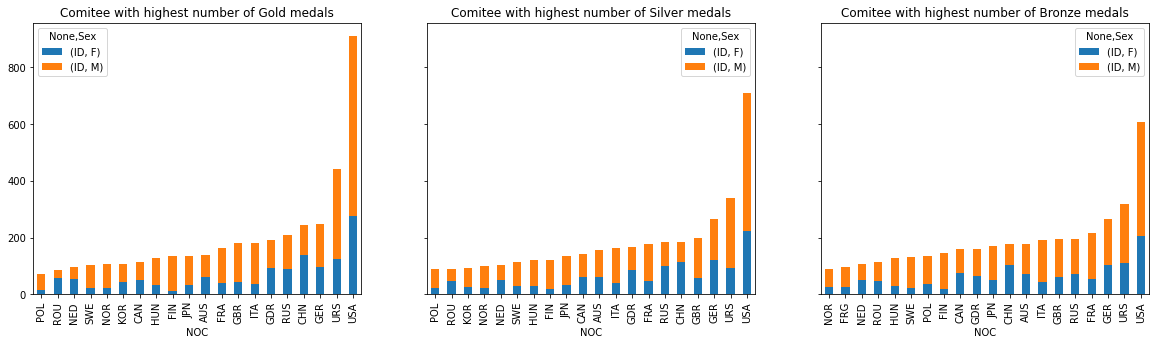

In [45]:
f, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
for idx, med in enumerate(['Gold', 'Silver', 'Bronze']):
    comitee = pd.pivot_table(medals_country[medals_country.Medal == med], index='NOC', columns='Sex').fillna(0)
    comitee[('ID', 'Total')] = comitee[('ID', 'F')] + comitee[('ID', 'M')]
    comitee.sort_values([('ID', 'Total')]).iloc[-20:,:2].plot(kind='bar', stacked=True, ax=ax[idx], title='Comitee with highest number of {} medals'.format(med))

#### Summer Games

In [46]:
medals_summer = df_athletes[df_athletes['Season'] == 'Summer'].dropna().\
                groupby(['NOC', 'Event', 'Collectivity', 'Year', 'Sex', 'Medal'], \
                as_index=False).count()\
                [['NOC', 'Event', 'Collectivity', 'Year', 'Sex', 'Medal', 'ID']]

medals_summer.loc[medals_summer['Collectivity']=='Team', 'ID'] = 1

In [47]:
medals_summer_country = medals_summer.groupby(['Sex', 'NOC', 'Medal']).\
                    sum().reset_index()[['Sex', 'NOC', 'Medal', 'ID']]

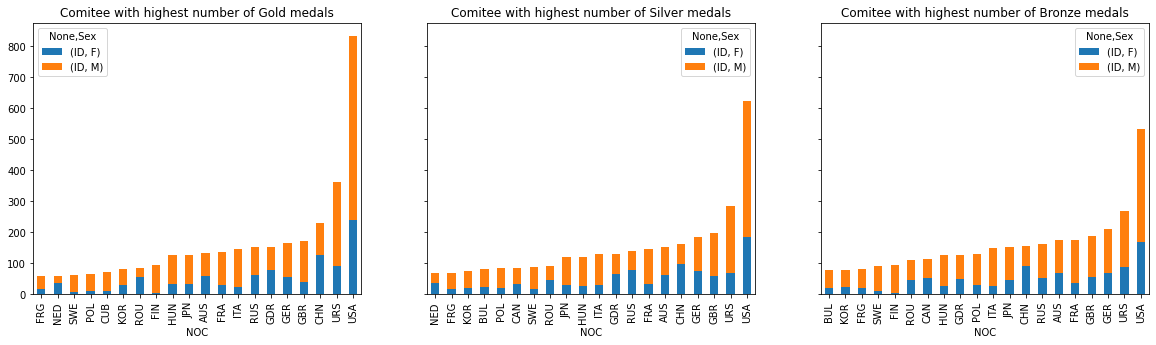

In [48]:
f, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
for idx, med in enumerate(['Gold', 'Silver', 'Bronze']):
    comitee = pd.pivot_table(medals_summer_country[medals_summer_country.Medal == med], index='NOC', columns='Sex').fillna(0)
    comitee[('ID', 'Total')] = comitee[('ID', 'F')] + comitee[('ID', 'M')]
    comitee.sort_values([('ID', 'Total')]).iloc[-20:,:2].plot(kind='bar', stacked=True, ax=ax[idx], title='Comitee with highest number of {} medals'.format(med))

#### Winter Games

In [49]:
medals_winter = df_athletes[df_athletes['Season'] == 'Winter'].dropna().\
                groupby(['NOC', 'Event', 'Collectivity', 'Year', 'Sex', 'Medal'], \
                as_index=False).count()\
                [['NOC', 'Event', 'Collectivity', 'Year', 'Sex', 'Medal', 'ID']]

medals_winter.loc[medals_winter['Collectivity']=='Team', 'ID'] = 1

In [50]:
medals_winter_country = medals_winter.groupby(['Sex', 'NOC', 'Medal']).\
                    sum().reset_index()[['Sex', 'NOC', 'Medal', 'ID']]

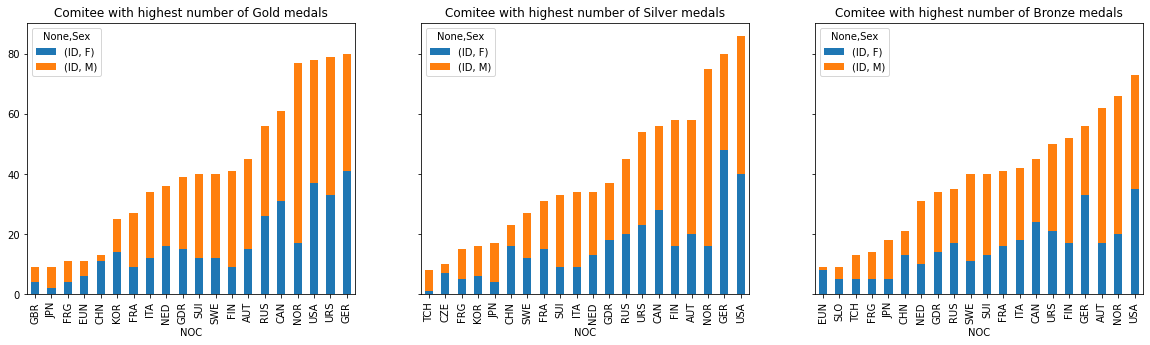

In [51]:
f, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
for idx, med in enumerate(['Gold', 'Silver', 'Bronze']):
    comitee = pd.pivot_table(medals_winter_country[medals_winter_country.Medal == med], index='NOC', columns='Sex').fillna(0)
    comitee[('ID', 'Total')] = comitee[('ID', 'F')] + comitee[('ID', 'M')]
    comitee.sort_values([('ID', 'Total')]).iloc[-20:,:2].plot(kind='bar', stacked=True, ax=ax[idx], title='Comitee with highest number of {} medals'.format(med))

## Country point of view - per sport
### All Seasons
The result is visible [here](https://github.com/com-480-data-visualization/com-480-project-knn-viz/blob/master/data/top_countries_sports.csv). We can see the countries that achieved more medals in the main sports. We can see that some countries are very good in some particular sports.

In [52]:
# for the most major sports, get list of top countries in terms of medals.

major_sports = pd.DataFrame(df_athletes[['Games','Sport']].drop_duplicates().groupby('Sport').size().\
                            sort_values(0,ascending=False).head(50)).index

sport_countries = df_athletes[['Team','NOC','Year','Season','Sport','Medal']].dropna()
sport_countries = pd.DataFrame(sport_countries[sport_countries.Sport.apply(lambda x : x in major_sports)]\
                               .groupby(['Season','Sport','NOC']).size())

sport_countries = sport_countries.rename(columns={0:'medals'})
sport_countries = sport_countries.sort_values(['Season','Sport','medals'], ascending=(True, True, False))

sport_countries['rank'] = sport_countries.groupby(['Season','Sport']).rank(ascending=False).medals
sport_countries[sport_countries['rank']<6].to_csv('data/top_countries_sports.csv')

## Athlete point of view

### Who has more medals?

In [53]:
count_medals = df_athletes.groupby(['Name', 'Medal']).agg({'Sport':'count'}).\
                rename(columns={'Sport':'total'}).reset_index()

**Greatest number of GOLD MEDALS**

In [54]:
count_medals[count_medals.Medal == 'Gold'].sort_values('total', ascending=False).head(10)

,Name,Medal,total
21615,"Michael Fred Phelps, II",Gold,23
25624,"Raymond Clarence ""Ray"" Ewry",Gold,10
24072,Paavo Johannes Nurmi,Gold,9
18261,Larysa Semenivna Latynina (Diriy-),Gold,9
20684,Mark Andrew Spitz,Gold,9
9349,"Frederick Carlton ""Carl"" Lewis",Gold,9
14576,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Gold,8
3626,Birgit Fischer-Schmidt,Gold,8
21196,"Matthew Nicholas ""Matt"" Biondi",Gold,8
27440,Sawao Kato,Gold,8


**Greatest number of SILVER MEDALS**

In [55]:
count_medals[count_medals.Medal == 'Silver'].sort_values('total', ascending=False).head(10)

,Name,Medal,total
21994,Mikhail Yakovlevich Voronin,Silver,6
27949,Shirley Frances Babashoff,Silver,6
666,Aleksandr Nikolayevich Dityatin,Silver,6
747,Aleksandr Vladimirovich Popov,Silver,6
32564,Yang Yang,Silver,6
7256,Edoardo Mangiarotti,Silver,5
16919,Katalin Kovcs,Silver,5
18580,Leisel Marie Jones,Silver,5
31018,Viktor Nikitovich Lisitsky,Silver,5
1726,Andrea Ehrig-Schne-Mitscherlich,Silver,5


**Greatest number of BRONZE MEDALS**

In [56]:
count_medals[count_medals.Medal == 'Bronze'].sort_values('total', ascending=False).head(10)

,Name,Medal,total
863,Aleksey Yuryevich Nemov,Bronze,6
11637,Harri Tapani Kirvesniemi,Bronze,6
11851,Heikki Ilmari Savolainen,Bronze,6
9300,Franziska van Almsick,Bronze,6
21505,Merlene Joyce Ottey-Page,Bronze,6
210,"Adrianus Egbert Willem ""Arie"" de Jong",Bronze,5
24969,"Philip Aron ""Phil"" Edwards",Bronze,5
22629,Natalie Anne Coughlin (-Hall),Bronze,5
2495,Antje Buschschulte (-Meeuw),Bronze,5
5938,Daniel Jean Claude Ernest Revenu,Bronze,5


**Greatest number of MEDALS**

In [57]:
count_medals.groupby('Name').sum().sort_values('total', ascending=False).head(10)

,total
Name,
"Michael Fred Phelps, II",28
Larysa Semenivna Latynina (Diriy-),18
Nikolay Yefimovich Andrianov,15
Borys Anfiyanovych Shakhlin,13
Takashi Ono,13
Ole Einar Bjrndalen,13
Edoardo Mangiarotti,13
Ryan Steven Lochte,12
Birgit Fischer-Schmidt,12


### Who has participated more years?

In [58]:
ath_year_sport = df_athletes.groupby(['Name']).agg({
    'Year':'nunique', 'Sport':'unique'
})

In [59]:
ath_year_sport.sort_values(['Year', 'Name'], ascending=False).head(15)

,Year,Sport
Name,,
Ian Millar,10,[Equestrianism]
Hubert Raudaschl,9,[Sailing]
Afanasijs Kuzmins,9,[Shooting]
Rajmond Debevec,8,[Shooting]
Raimondo D'Inzeo,8,[Equestrianism]
Piero D'Inzeo,8,[Equestrianism]
Paul Bert Elvstrm,8,[Sailing]
Nino Salukvadze (-Machavariani),8,[Shooting]
Lesley Allison Thompson-Willie,8,[Rowing]


In [60]:
df_athletes[df_athletes.Name == ath_year_sport.sort_values('Year', ascending=False).reset_index().iloc[0,0]].\
groupby(['Name','Year', 'Season', 'Sport']).agg({
    'type_event':'unique', 'Medal':['unique','nunique']
})

type_event  \
                                                                    unique   
Name       Year Season Sport                                                 
Ian Millar 1972 Summer Equestrianism                       [Jumping, Team]   
           1976 Summer Equestrianism                       [Jumping, Team]   
           1984 Summer Equestrianism  [Jumping, Individual, Jumping, Team]   
           1988 Summer Equestrianism  [Jumping, Individual, Jumping, Team]   
           1992 Summer Equestrianism  [Jumping, Individual, Jumping, Team]   
           1996 Summer Equestrianism  [Jumping, Individual, Jumping, Team]   
           2000 Summer Equestrianism  [Jumping, Individual, Jumping, Team]   
           2004 Summer Equestrianism                 [Jumping, Individual]   
           2008 Summer Equestrianism  [Jumping, Individual, Jumping, Team]   
           2012 Summer Equestrianism  [Jumping, Individual, Jumping, Team]   

                                              Medal          
                                             unique nunique  
Name       Year Season Sport                                 
Ian Millar 1972 Summer Equestrianism          [nan]       0  
           1976 Summer Equestrianism          [nan]       0  
           1984 Summer Equestrianism          [nan]       0  
           1988 Summer Equestrianism          [nan]       0  
           1992 Summer Equestrianism          [nan]       0  
           1996 Summer Equestrianism          [nan]       0  
           2000 Summer Equestrianism          [nan]       0  
           2004 Summer Equestrianism          [nan]       0  
           2008 Summer Equestrianism  [nan, Silver]       1  
           2012 Summer Equestrianism          [nan]       0

In [61]:
df_athletes[df_athletes.Name == ath_year_sport.sort_values('Year', ascending=False).reset_index().iloc[1,0]].\
groupby(['Name','Year', 'Season', 'Sport']).agg({
    'type_event':'unique', 'Medal':['unique','nunique']
})

type_event     Medal  \
                                                       unique    unique   
Name             Year Season Sport                                        
Hubert Raudaschl 1964 Summer Sailing      [One Person Dinghy]     [nan]   
                 1968 Summer Sailing      [One Person Dinghy]  [Silver]   
                 1972 Summer Sailing    [Two Person Keelboat]     [nan]   
                 1976 Summer Sailing  [Three Person Keelboat]     [nan]   
                 1980 Summer Sailing    [Two Person Keelboat]  [Silver]   
                 1984 Summer Sailing    [Two Person Keelboat]     [nan]   
                 1988 Summer Sailing    [Two Person Keelboat]     [nan]   
                 1992 Summer Sailing    [Two Person Keelboat]     [nan]   
                 1996 Summer Sailing    [Two Person Keelboat]     [nan]   

                                              
                                     nunique  
Name             Year Season Sport            
Hubert Raudaschl 1964 Summer Sailing       0  
                 1968 Summer Sailing       1  
                 1972 Summer Sailing       0  
                 1976 Summer Sailing       0  
                 1980 Summer Sailing       1  
                 1984 Summer Sailing       0  
                 1988 Summer Sailing       0  
                 1992 Summer Sailing       0  
                 1996 Summer Sailing       0

In [62]:
df_athletes[df_athletes.Name == ath_year_sport.sort_values('Year', ascending=False).reset_index().iloc[2,0]].\
groupby(['Name','Year', 'Season', 'Sport']).agg({
    'type_event':'unique', 'Medal':['unique','nunique']
})

type_event  \
                                                                                   unique   
Name              Year Season Sport                                                         
Afanasijs Kuzmins 1976 Summer Shooting                     [Rapid-Fire Pistol, 25 metres]   
                  1980 Summer Shooting                     [Rapid-Fire Pistol, 25 metres]   
                  1988 Summer Shooting                     [Rapid-Fire Pistol, 25 metres]   
                  1992 Summer Shooting                     [Rapid-Fire Pistol, 25 metres]   
                  1996 Summer Shooting  [Air Pistol, 10 metres, Rapid-Fire Pistol, 25 ...   
                  2000 Summer Shooting                     [Rapid-Fire Pistol, 25 metres]   
                  2004 Summer Shooting                     [Rapid-Fire Pistol, 25 metres]   
                  2008 Summer Shooting                     [Rapid-Fire Pistol, 25 metres]   
                  2012 Summer Shooting                     [Rapid-Fire Pistol, 25 metres]   

                                           Medal          
                                          unique nunique  
Name              Year Season Sport                       
Afanasijs Kuzmins 1976 Summer Shooting     [nan]       0  
                  1980 Summer Shooting     [nan]       0  
                  1988 Summer Shooting    [Gold]       1  
                  1992 Summer Shooting  [Silver]       1  
                  1996 Summer Shooting     [nan]       0  
                  2000 Summer Shooting     [nan]       0  
                  2004 Summer Shooting     [nan]       0  
                  2008 Summer Shooting     [nan]       0  
                  2012 Summer Shooting     [nan]       0

### Who has participated in greater number of different sports?

In [63]:
ath_year_sport['number_Sports'] = ath_year_sport['Sport'].apply(lambda x: len(x))

In [64]:
ath_year_sport.sort_values('number_Sports', ascending=False).head(10)

,Year,Sport,number_Sports
Name,,,
Kim Seong-Eun,5,"[Hockey, Water Polo, Synchronized Swimming, Bo...",5
Wolfgang Mller,4,"[Weightlifting, Hockey, Athletics, Equestriani...",5
Zhang Li,5,"[Fencing, Baseball, Athletics, Speed Skating, ...",5
Wang Nan,5,"[Speed Skating, Judo, Table Tennis, Shooting, ...",5
Frantiek imnek,3,"[Ski Jumping, Nordic Combined, Cross Country S...",4
Mohamed El-Sayed,3,"[Athletics, Boxing, Hockey, Football]",4
Bla Nagy,5,"[Shooting, Fencing, Archery, Wrestling]",4
Chen Jing,6,"[Table Tennis, Athletics, Ice Hockey, Volleyball]",4
Carl Schuhmann,1,"[Gymnastics, Weightlifting, Wrestling, Athletics]",4


In [65]:
df_athletes[df_athletes.Name == ath_year_sport.sort_values('number_Sports', ascending=False).reset_index().iloc[0,0]].\
groupby(['Name','Year', 'Season', 'Sport']).agg({
    'type_event':'unique', 'Medal':['unique','nunique']
})

type_event  Medal  \
                                                             unique unique   
Name          Year Season Sport                                              
Kim Seong-Eun 1968 Summer Boxing                    [Featherweight]  [nan]   
              1988 Summer Water Polo             [Men's Water Polo]  [nan]   
              2000 Summer Hockey                           [Hockey]  [nan]   
              2004 Summer Hockey                           [Hockey]  [nan]   
                          Synchronized Swimming      [Women's Duet]  [nan]   
              2012 Summer Athletics                      [Marathon]  [nan]   

                                                         
                                                nunique  
Name          Year Season Sport                          
Kim Seong-Eun 1968 Summer Boxing                      0  
              1988 Summer Water Polo                  0  
              2000 Summer Hockey                      0  
              2004 Summer Hockey                      0  
                          Synchronized Swimming       0  
              2012 Summer Athletics                   0

In [66]:
df_athletes[df_athletes.Name == ath_year_sport.sort_values('number_Sports', ascending=False).reset_index().iloc[1,0]].\
groupby(['Name','Year', 'Season', 'Sport']).agg({
    'type_event':'unique', 'Medal':['unique','nunique']
})

type_event  \
                                                                                            unique   
Name           Year Season Sport                                                                     
Wolfgang Mller 1960 Summer Weightlifting                                      [Middle-Heavyweight]   
               1968 Summer Athletics                            [400 metres, 4 x 400 metres Relay]   
                           Equestrianism                    [Dressage, Individual, Dressage, Team]   
                           Hockey                                                         [Hockey]   
               1972 Summer Equestrianism                    [Dressage, Individual, Dressage, Team]   
               1980 Winter Cross Country Skiing  [Skiing Men's 15 kilometres, Skiing Men's 30 k...   

                                                 Medal          
                                                unique nunique  
Name           Year Season Sport                                
Wolfgang Mller 1960 Summer Weightlifting         [nan]       0  
               1968 Summer Athletics             [nan]       0  
                           Equestrianism         [nan]       0  
                           Hockey                [nan]       0  
               1972 Summer Equestrianism         [nan]       0  
               1980 Winter Cross Country Skiing  [nan]       0

In [67]:
df_athletes[df_athletes.Name == ath_year_sport.sort_values('number_Sports', ascending=False).reset_index().iloc[2,0]].\
groupby(['Name','Year', 'Season', 'Sport']).agg({
    'type_event':'unique', 'Medal':['unique','nunique']
})

type_event  Medal  \
                                                            unique unique   
Name     Year Season Sport                                                  
Zhang Li 1980 Winter Speed Skating          [Women's 1,000 metres]  [nan]   
         1996 Summer Handball                           [Handball]  [nan]   
         2004 Summer Fencing        [epee, Individual, epee, Team]  [nan]   
                     Handball                           [Handball]  [nan]   
         2008 Summer Athletics                     [Javelin Throw]  [nan]   
                     Baseball                           [Baseball]  [nan]   
         2012 Summer Athletics                     [Javelin Throw]  [nan]   

                                            
                                   nunique  
Name     Year Season Sport                  
Zhang Li 1980 Winter Speed Skating       0  
         1996 Summer Handball            0  
         2004 Summer Fencing             0  
                     Handball            0  
         2008 Summer Athletics           0  
                     Baseball            0  
         2012 Summer Athletics           0

### Who has taken part in both Summer and Winter Olympics?

In [68]:
df_athletes[df_athletes.Name.isin(list(a.intersection(b)))].groupby('Name').agg({
    'Sport':['unique', 'nunique'], 'NOC':['unique'], 'Year':['unique', 'nunique'], 'Medal':['unique']
}).sort_values(('Sport','nunique'), ascending=False)

Sport  \
                                                                                 unique   
Name                                                                                      
Zhang Li                              [Fencing, Baseball, Athletics, Speed Skating, ...   
Wang Nan                              [Speed Skating, Judo, Table Tennis, Shooting, ...   
Wolfgang Mller                        [Weightlifting, Hockey, Athletics, Equestriani...   
Chen Jing                             [Table Tennis, Athletics, Ice Hockey, Volleyball]   
Frantiek imnek                        [Ski Jumping, Nordic Combined, Cross Country S...   
...                                                                                 ...   
Walter Andreas Jakobsson                                               [Figure Skating]   
Simone Henriette Sabouret (Roussel-)                                   [Figure Skating]   
Ethel M. Muckelt                                                       [Figure Skating]   
Vilm Loos                                                                  [Ice Hockey]   
Marius Jaccard                                                             [Ice Hockey]   

                                                          NOC  \
                                     nunique           unique   
Name                                                            
Zhang Li                                   5            [CHN]   
Wang Nan                                   5            [CHN]   
Wolfgang Mller                             5  [GER, FRG, GDR]   
Chen Jing                                  4       [CHN, TPE]   
Frantiek imnek                             4            [TCH]   
...                                      ...              ...   
Walter Andreas Jakobsson                   1            [FIN]   
Simone Henriette Sabouret (Roussel-)       1            [FRA]   
Ethel M. Muckelt                           1            [GBR]   
Vilm Loos                                  1            [TCH]   
Marius Jaccard                             1            [SUI]   

                                                                      Year  \
                                                                    unique   
Name                                                                         
Zhang Li                                    [2004, 2008, 2012, 1980, 1996]   
Wang Nan                                    [2010, 1992, 2000, 2004, 2008]   
Wolfgang Mller                                    [1960, 1968, 1972, 1980]   
Chen Jing                             [1988, 1996, 2000, 1998, 2002, 2004]   
Frantiek imnek                                          [1932, 1936, 1948]   
...                                                                    ...   
Walter Andreas Jakobsson                                [1920, 1924, 1928]   
Simone Henriette Sabouret (Roussel-)                          [1920, 1924]   
Ethel M. Muckelt                                        [1920, 1924, 1928]   
Vilm Loos                                                     [1920, 1924]   
Marius Jaccard                                                [1920, 1924]   

                                                                    Medal  
                                     nunique                       unique  
Name                                                                       
Zhang Li                                   5                        [nan]  
Wang Nan                                   5          [nan, Gold, Silver]  
Wolfgang Mller                             4                        [nan]  
Chen Jing                                  6  [Gold, Silver, nan, Bronze]  
Frantiek imnek                             3                        [nan]  
...                                      ...                          ...  
Walter Andreas Jakobsson                   3          [Gold, Silver, nan]  
Simone Henriette Sabouret (Roussel-)       